In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [10]:
data = pd.read_csv('../result/experiment_results.csv')

In [3]:
data.head()

,text_index,population_size,max_generations,original_text,generated_summary,reference_summary,best_fitness,avg_fitness,fitness_std_dev,best_overall_fitness,best_chromosome_generation
0,0,50,10,"LONDON, England (Reuters) -- Harry Potter star...","Daniel Radcliffe as Harry Potter in ""Harry Pot...",Harry Potter star Daniel Radcliffe gets £20M f...,0.6177,0.5349,0.0707,0.6177,9
1,1,50,10,Editor's note: In our Behind the Scenes series...,"Here, Soledad O'Brien takes users inside a jai...",Mentally ill inmates in Miami are housed on th...,0.3782,0.3505,0.0080,0.3782,10
2,2,50,10,"MINNEAPOLIS, Minnesota (CNN) -- Drivers who we...","MINNEAPOLIS, Minnesota (CNN) -- Drivers who we...","NEW: ""I thought I was going to die,"" driver sa...",0.3590,0.3477,0.0056,0.3629,8
3,3,50,10,WASHINGTON (CNN) -- Doctors removed five small...,WASHINGTON (CNN) -- Doctors removed five small...,"Five small polyps found during procedure; ""non...",0.5565,0.4787,0.0562,0.5672,6
4,4,50,10,(CNN) -- The National Football League has ind...,(CNN) -- The National Football League has ind...,"NEW: NFL chief, Atlanta Falcons owner critical...",0.3388,0.3238,0.0055,0.3477,9


In [4]:
data.shape

(75, 11)

# Generating Insights

In [16]:
import matplotlib.cm as cm
import numpy as np

In [17]:
unique_classes = data['text_index'].unique()
distinct_colors = cm.tab20(np.linspace(0, 1, len(unique_classes)))  # Use 'tab20' colormap for more distinct colors
class_color_map = dict(zip(unique_classes, distinct_colors))  # Update color mapping

## Generated vs Reference Summary

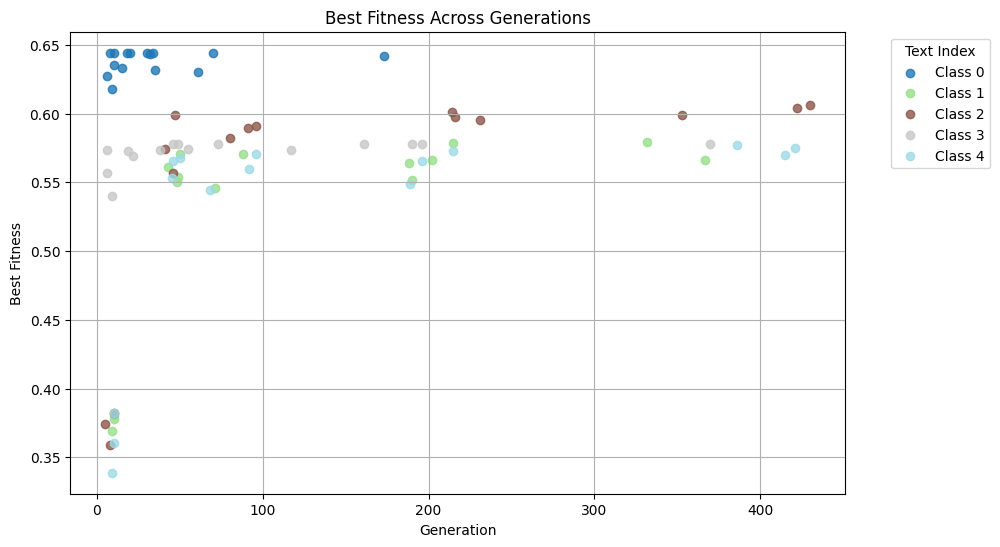

In [19]:
plt.figure(figsize=(10, 6))
for cls in unique_classes:
    subset = data[data['text_index'] == cls]
    plt.scatter(subset['best_chromosome_generation'], subset['best_fitness'], 
                color=class_color_map[cls], label=f'Class {cls}', alpha=0.8)
plt.title('Best Fitness Across Generations')
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.legend(title="Text Index", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

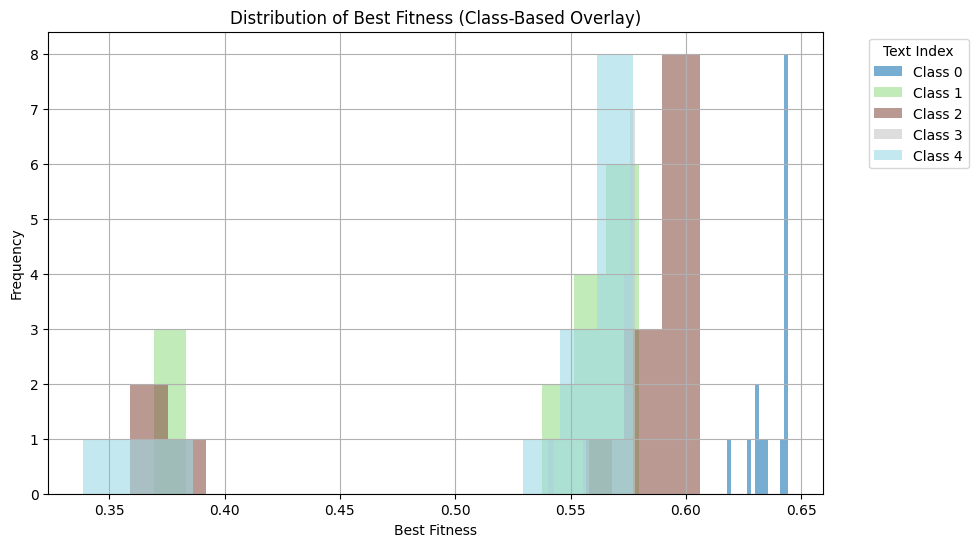

In [21]:
plt.figure(figsize=(10, 6))
for cls in unique_classes:
    subset = data[data['text_index'] == cls]
    plt.hist(subset['best_fitness'], bins=15, alpha=0.6, 
             color=class_color_map[cls], label=f'Class {cls}')
plt.title('Distribution of Best Fitness (Class-Based Overlay)')
plt.xlabel('Best Fitness')
plt.ylabel('Frequency')
plt.legend(title="Text Index", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

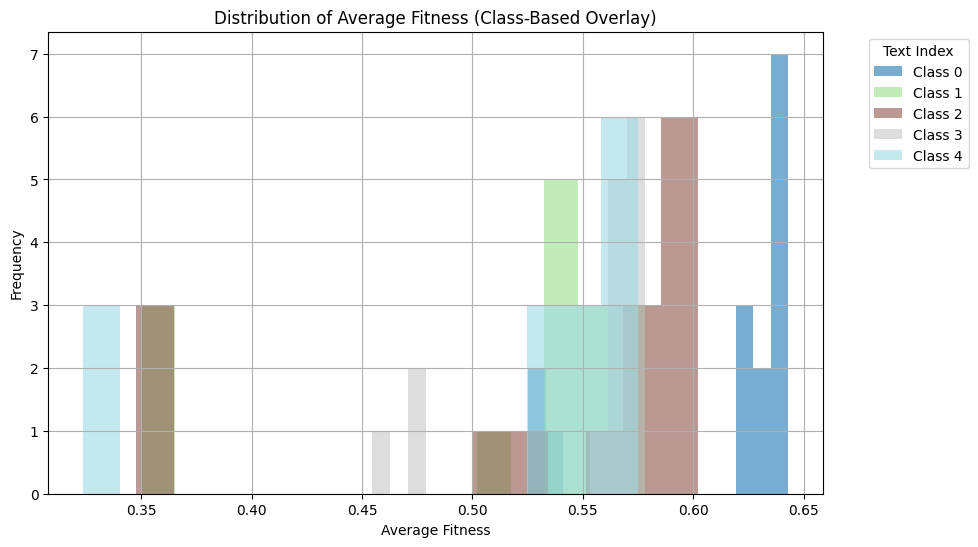

In [22]:
plt.figure(figsize=(10, 6))
for cls in unique_classes:
    subset = data[data['text_index'] == cls]
    plt.hist(subset['avg_fitness'], bins=15, alpha=0.6, 
             color=class_color_map[cls], label=f'Class {cls}')
plt.title('Distribution of Average Fitness (Class-Based Overlay)')
plt.xlabel('Average Fitness')
plt.ylabel('Frequency')
plt.legend(title="Text Index", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

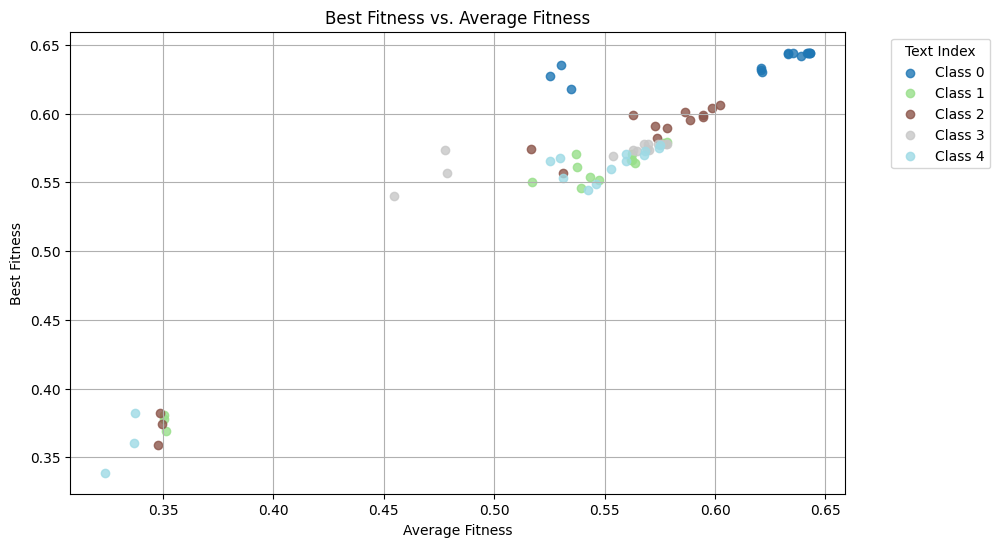

In [20]:
plt.figure(figsize=(10, 6))
for cls in unique_classes:
    subset = data[data['text_index'] == cls]
    plt.scatter(subset['avg_fitness'], subset['best_fitness'], 
                color=class_color_map[cls], label=f'Class {cls}', alpha=0.8)
plt.title('Best Fitness vs. Average Fitness')
plt.xlabel('Average Fitness')
plt.ylabel('Best Fitness')
plt.legend(title="Text Index", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


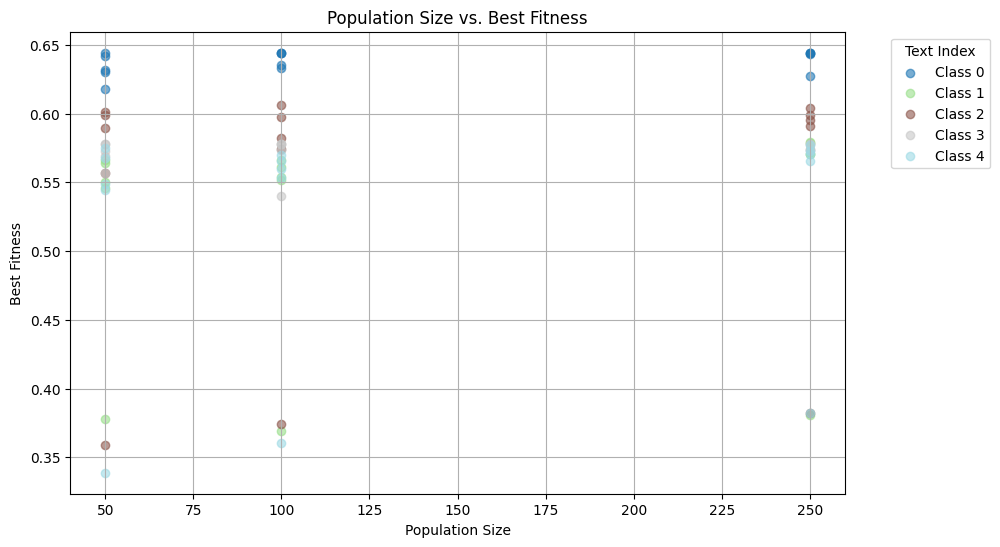

In [23]:
plt.figure(figsize=(10, 6))
for cls in unique_classes:
    subset = data[data['text_index'] == cls]
    plt.scatter(subset['population_size'], subset['best_fitness'], 
                color=class_color_map[cls], label=f'Class {cls}', alpha=0.6)
plt.title('Population Size vs. Best Fitness')
plt.xlabel('Population Size')
plt.ylabel('Best Fitness')
plt.legend(title="Text Index", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [25]:
# Assign unique colors for classes
unique_classes = data['text_index'].unique()
distinct_colors = cm.tab20(np.linspace(0, 1, len(unique_classes)))
class_color_map = dict(zip(unique_classes, distinct_colors))

# Calculate the length of the original text
data['original_text_length'] = data['original_text'].str.len()

# Aggregate to find the best fitness score and its generation for each text_index
aggregated_data = data.groupby('text_index', as_index=False).agg({
    'original_text_length': 'mean',  # Average text length per class
    'best_fitness': 'max',          # Best fitness score per class
    'best_chromosome_generation': 'max'  # Max generation of the best fitness
})

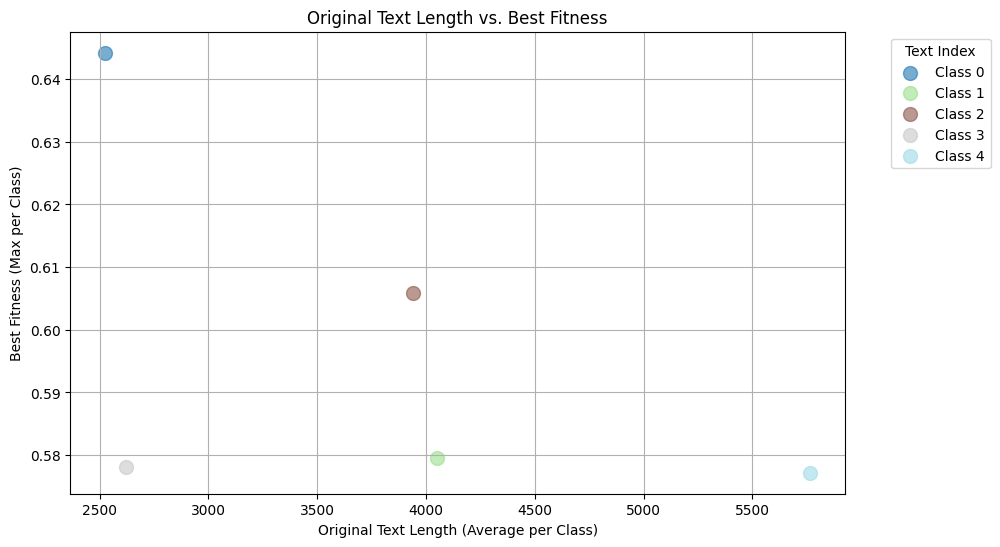

In [26]:
# Plot 1: Original Text Length vs. Best Fitness
plt.figure(figsize=(10, 6))
for cls in unique_classes:
    subset = aggregated_data[aggregated_data['text_index'] == cls]
    plt.scatter(subset['original_text_length'], subset['best_fitness'], 
                color=class_color_map[cls], label=f'Class {cls}', alpha=0.6, s=100)
plt.title('Original Text Length vs. Best Fitness')
plt.xlabel('Original Text Length (Average per Class)')
plt.ylabel('Best Fitness (Max per Class)')
plt.legend(title="Text Index", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

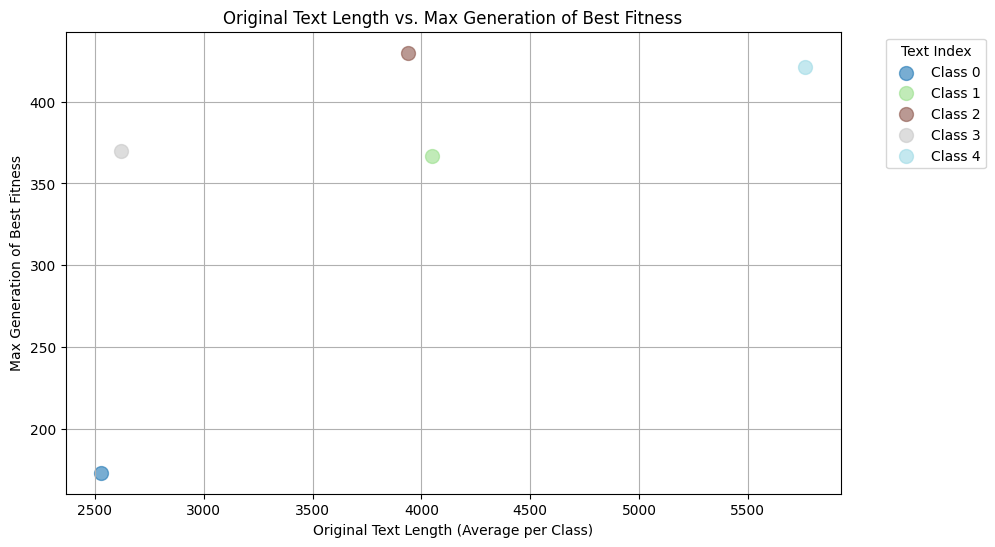

In [27]:
# Plot 2: Original Text Length vs. Max Generation of Best Fitness
plt.figure(figsize=(10, 6))
for cls in unique_classes:
    subset = aggregated_data[aggregated_data['text_index'] == cls]
    plt.scatter(subset['original_text_length'], subset['best_chromosome_generation'], 
                color=class_color_map[cls], label=f'Class {cls}', alpha=0.6, s=100)
plt.title('Original Text Length vs. Max Generation of Best Fitness')
plt.xlabel('Original Text Length (Average per Class)')
plt.ylabel('Max Generation of Best Fitness')
plt.legend(title="Text Index", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()